#### 목표
- 타이타닉 데이터를 학습해서 생존자/사망자를 예측해보자
- 머신러닝 전체 프로세스를 정리해보자

#### 머신러닝 프로세스
1. 문제 정의
2. 데이터 수집
3. 데이터 전처리
4. 탐색적 데이터 분석(EDA)
5. 모델 선택 및 하이퍼파라미터 튜닝
6. 모델 학습
7. 모델 평가

#### 1. 문제정의
- 분류
- 생존자/사망자 예측
- 대회에서 높은 순위를 차지

#### 2. 데이터 수집
- kaggle 타이타닉 대회 데이터 셋 활용

In [2]:
import numpy as np
import pandas as pd
#화면에 보여줄 최대 컬럼의 갯수 설정(중간 생략x)
pd.set_option('display.max_columns',100)
#화면에 보여줄 최대 row의 갯수 설정(중간 생략x)
pd.set_option('display.max_rows',1000)
#컬럼의 너비 최대치 해제
pd.set_option('display.max_colwidth',None)
import matplotlib.pyplot as plt# 시각화 도구 (하나하나씩 전부 직접 세팅)
import seaborn as sns # 시각화 도구 (필요한 데이터를 넣어주면 세팅을 알아서 해줌)

In [3]:
#더이상 PassengerId는 컬럼이 아님(index)
train = pd.read_csv('data/train.csv', index_col='PassengerId')
test = pd.read_csv('data/test.csv',index_col='PassengerId')

In [4]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S


In [5]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


#### 3~4. 데이터 전처리 및 탐색적데이터분석(EDA)
- 결측치
- 특성공학(스케일링, 인코딩, 변환..)
- 기술통계
- 상관계수
- 시각화

#### 결측치 확인

In [6]:
#display 한 셀 안에 다 볼 수 있다.
from IPython.core.display import HTML

In [7]:
display(HTML("<h1>train</h1>"))
display(train.info())
display(HTML("<h1>test</h1>"))
display(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


None

#### Embarked 결측치 채우기

In [8]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
#기술 통계
#최빈값으로 채우기(fillna) // inplace >> 실제 데이터에 채우려면 넣어야됨(영구히)
train['Embarked'].fillna('S',inplace=True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Fare 결측치 채우기

In [11]:
#중앙값
train['Fare'].median()

14.4542

In [12]:
test['Fare'].fillna(14.4542,inplace=True)

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


#### Age 결측치 채우기
- 단순 기술 통계로 결측치를 채우지 말자
- 관련 있는 주면 컬럼 정보를 활용해 결측치를 채워보자

In [14]:
#상관계수 >> 가장 관계 있는 건 Pclass (큰 수가 아니라 -1이나 1에 가까운 게 가장 상관있는 데이터)
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- 나이와 가장 관계가 있는 Pclass를 사용해보자(약한 음의 상관관계)
- 등급별 나이의 중앙값을 확인해보자

In [15]:
#두개 이상의 컬럼을 보려면 리스트 형태로 보자
#Pclass 기준으로 그룹화
#그룹화 된 데이터의 중앙값
train[['Pclass','Age']].groupby(by='Pclass').median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


- 시대상을 고려했을때 성별에 따른 차이가 있을 수 있다. 함께 고려해보자

In [16]:
train[['Pclass','Sex','Age']].groupby(by=['Pclass','Sex']).median()

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [17]:
#transform() 데이터를 그룹화(중앙값 구한것)한 걸로 변환
#891개의 데이터들은 위에 구한값들중에 하나로 변환
#transform() 괄호안에 median 뿐만 아니려 min , 평균값, 기술 통계 등등 넣을수 있음
train_age_transformed=train[['Pclass','Sex','Age']].groupby(by=['Pclass','Sex']).transform('median')

In [18]:
train_age_transformed

,Age
PassengerId,
1,25.0
2,35.0
3,21.5
4,35.0
5,25.0
6,25.0
7,40.0
8,25.0
9,21.5


In [19]:
#Age 결측치 채우기
#train_age_transformed 를 그대로 쓰지 않는이유 : 2차원 형태라서 series 형태로 바꿔서 써야됨
train['Age'].fillna(train_age_transformed['Age'],inplace=True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Q1.test 데이터 Age 결측치 직접 채워보기

In [21]:
test_age_transformed=test[['Pclass','Sex','Age']].groupby(by=['Pclass','Sex']).transform('median')

In [22]:
test['Age'].fillna(test_age_transformed['Age'],inplace=True)

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


#### Cabin 결측치 채우기

In [24]:
#unique >> 중복된 값 없애고 하나씩만 뽑아준다
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [25]:
#결측치 m(비어있다)로 채우기
train['Cabin'].fillna('M',inplace=True)
test['Cabin'].fillna('M',inplace=True)

In [26]:
train['Cabin'].unique()

array(['M', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [27]:
#알파벳 뒤에 있는 숫자 없애기 >> 너무 복잡하면 힘듬
#str 문자열 함수(각 셀마다 문자열 함수 주고싶을때)
#[0]> 첫글자만(0번째) 인덱싱
train['Cabin']=train['Cabin'].str[0]
test['Cabin']=test['Cabin'].str[0]

In [28]:
train['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [29]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non

(None, None)

#### 데이터 탐색
- train 데이터를 탐색
- test 데이터를 탐색하는 것은 일반화된 모델을 만드는데 도움 x

#### 범주형 데이터
- Cabin, Sex, Embarked, Pclass
- 각 카테고리별로 빈도를 많이 확인
- bar차트

#### Cabin 시각화

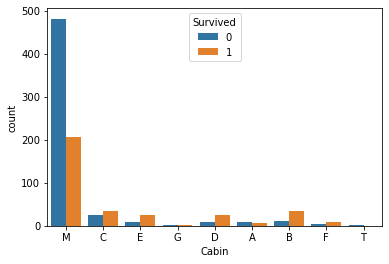

In [30]:
# seaborn으로 시각화
#countplot 막대그래프
#train 데이터를 x 축에 범례를 두고 차트 그려줌(or y)
#hue 무슨 갯수를 셀지 정한다
sns.countplot(data=train, x='Cabin', hue='Survived')

- M에서 상대적으로 사람이 많이 죽었다.
- 생존여부 판단에 활용해도 괜찮지 않을까

#### Pclass 범주화

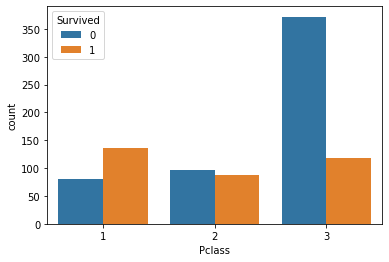

In [31]:
sns.countplot(data=train, x='Pclass', hue='Survived')

- 3등급에 탑승하면 죽을 확률이 높다.

#### Cabin과 Pclass 시각화

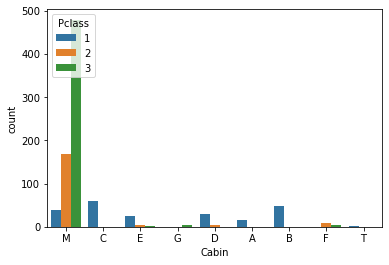

In [32]:
sns.countplot(data=train, x='Cabin', hue='Pclass')

- M 구역에 3등급 사람들이 많이 탑승 했다. 그래서 사망자의 비율이 높았다.
- M은 생존여부에 별로 상관이 없을 수도 있겠다.
- A, B, C에는 1등급 사람들만 탔다.(좋은 구역일듯)

#### Sex, Embarked 시각화

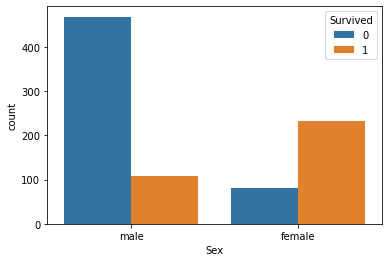

In [33]:
sns.countplot(data=train, x='Sex', hue='Survived')

- 남자가 상대적으로 많이 죽었고, 여성이 상대적으로 많이 살았다.

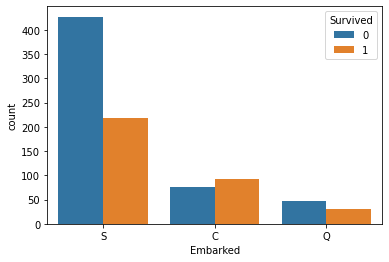

In [34]:
sns.countplot(data=train, x='Embarked', hue='Survived')

- S 지역에서 탑승한 사람들이 상대적으로 많이 죽었다.

#### 수치형 데이터
- Age, Fare, Sibsp, Parch
- 히스토그램, KDE(커널밀도추정)

#### Age 시각화

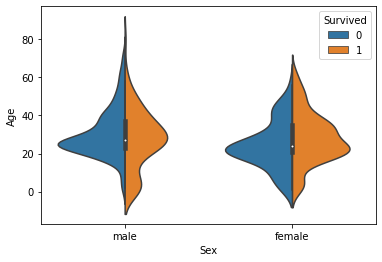

In [35]:
#violinplot >kde 그래프
#split > 반씩 붙혀서 보기 싶게
sns.violinplot(data=train, x='Sex', y='Age', hue='Survived', split=True)

- 20~40대 가 많이 사망/생존
- 나이가 어린 연령층에서 남자아이가 산 비율이 높고, 여자아이가 사망한 비율이 높다.

#### Fare 시각화

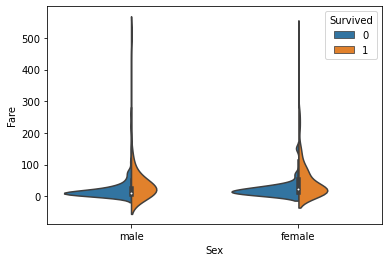

In [36]:
sns.violinplot(data=train, x='Sex', y='Fare', hue='Survived', split=True)

- 요금이 싼 사람들이 상대적으로 많이 죽었다.

#### SibSp(형제 배우자), Parch(부모 자식) 시각화
- 특성공학 : 컬럼에 연산을 통해서, 의미있는새로운 정보를 추출하는 행위
- Sibsp + Parch + 1(본인) >> Family_Size라는 컬럼생성

In [37]:
train['Family_size']= train['SibSp']+train['Parch']+1
test['Family_size']= test['SibSp']+test['Parch']+1

In [38]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1


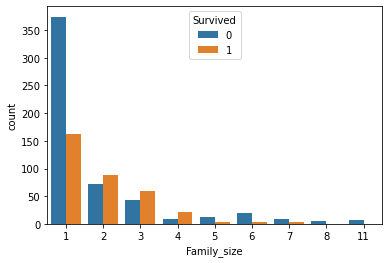

In [39]:
sns.countplot(data=train, x='Family_size', hue='Survived')

- 1명인 경우는 죽은 사람의 비율이 높다.
- 2~4명인 경우 산 사람의 비율이 높다.
- 5명 이상인 경우 죽은 사람의 비율이 높다.

- 수치형>범주형(Binning)
- 사소한 관찰 오류를 줄여준다.

In [40]:
# bins : 구간 정보[시작 값, 끝 값]>>컴퓨터가 해석할 때 시작값에 +1을 해서 해석
# labels : 구간에 대한 범주 이름
#1에서 1까지 , 2에서 4까지 , 5부터 20까지
bins = [0,1,4,20]
labels=['Alone','Small','Large']

#cut
train_cut=pd.cut(train['Family_size'], bins=bins, labels=labels)
train['Family_Group']=train_cut

test_cut=pd.cut(test['Family_size'], bins=bins, labels=labels)
test['Family_Group']=test_cut

In [41]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_Group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,C,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1,Alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,Small
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1,Alone


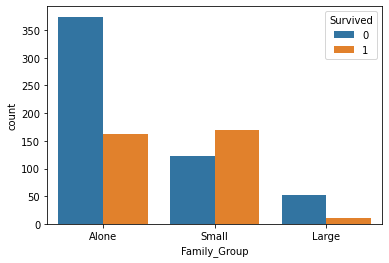

In [42]:
sns.countplot(data=train, x='Family_Group', hue='Survived')

#### Text 데이터
- Name, Ticket
- 비정형데이터 > 정형화

In [43]:
#호칭을 추출해보자.
train['Name']

PassengerId
1                                                                 Braund, Mr. Owen Harris
2                                     Cumings, Mrs. John Bradley (Florence Briggs Thayer)
3                                                                  Heikkinen, Miss. Laina
4                                            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                                                Allen, Mr. William Henry
6                                                                        Moran, Mr. James
7                                                                 McCarthy, Mr. Timothy J
8                                                          Palsson, Master. Gosta Leonard
9                                       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                                                    Nasser, Mrs. Nicholas (Adele Achem)
11                                                        Sandstrom, Miss. Marguerite Ru

In [44]:
#사용자 정의 함수
def split_title(name):
    return name.split(',')[1].split('.')[0].strip() #,를 기준으로 쪼갠다(리스트로 바뀜) > [1] : 두번째 꺼 꺼냄
                                                     #.를 기준으로 쪼갠다(리스트로 바뀜) > [0] : 첫번째 꺼 꺼냄
                                                     #strip 공백제거

In [45]:
#apply 반복적으로 처리를 도와줌
#apply 가 하나씩 이름을 꺼내서 사용자 정의 함수 동작
train['Title']=train['Name'].apply(split_title)
test['Title']=test['Name'].apply(split_title)

In [46]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_Group,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,2,Small,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,C,2,Small,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1,Alone,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,Small,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1,Alone,Mr


#### Title 시각화

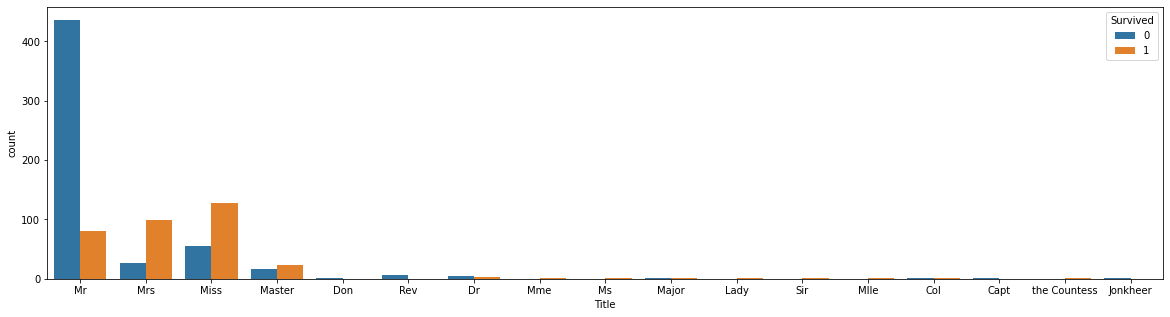

In [47]:
#크기 조절
plt.figure(figsize=(20,5))

sns.countplot(data=train, x='Title', hue='Survived')

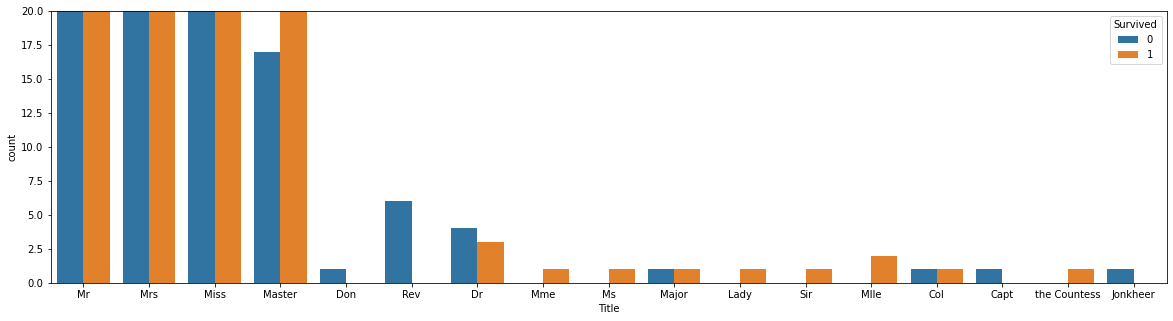

In [48]:
plt.figure(figsize=(20,5))
#y축 제한
plt.ylim(0,20)
sns.countplot(data=train, x='Title', hue='Survived')

- Mr, Mrs, Miss, Master, Rev는 남기고
- 나머지 호칭을 Other로 통합하자

In [49]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [50]:
#호칭 정리
convert_title_dic={
    'Mr' : 'Mr',
    'Mrs' : 'Mrs',
    'Miss' : 'Miss',
    'Master' : 'Master',
    'Don' : 'Other',
    'Rev' : 'Rev', 
    'Dr' : 'Other', 
    'Mme' : 'Other', 
    'Ms' : 'Other',
    'Major' : 'Other', 
    'Lady' : 'Other', 
    'Sir' : 'Other',
    'Mlle' : 'Other',
    'Col' : 'Other',
    'Capt' : 'Other',
    'the Countess' : 'Other',
    'Jonkheer' : 'Other',
    'Dona' : 'Other'
}

In [51]:
#mapping 호칭 통합
train['Title']=train['Title'].map(convert_title_dic)

In [52]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [53]:
test['Title']=test['Title'].map(convert_title_dic)

In [54]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

#### Ticket
- 티켓 정보는 삭제하자.

In [55]:
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [56]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [57]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


#### 문자형 데이터>>숫자형 데이터 변경
- 문자형 : Sex, Cabin, Embarked, Family_Group, Title
- 숫자형 : Pclass, Age, SibSp, Parch, Fare, Family_size

In [58]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Family_size', 'Family_Group', 'Title'],
      dtype='object')

#### 원 핫 인코딩

In [59]:
train[['Sex', 'Cabin', 'Embarked', 'Family_Group', 'Title']]

,Sex,Cabin,Embarked,Family_Group,Title
PassengerId,,,,,
1,male,M,S,Small,Mr
2,female,C,C,Small,Mrs
3,female,M,S,Alone,Miss
4,female,C,S,Small,Mrs
5,male,M,S,Alone,Mr
6,male,M,Q,Alone,Mr
7,male,E,S,Alone,Mr
8,male,M,S,Large,Master
9,female,M,S,Small,Mrs


In [60]:
#원 핫 인코딩 함수(excel 파일 참고)
one_hot_feature=pd.get_dummies(train[['Sex', 'Cabin', 'Embarked', 'Family_Group', 'Title']])

In [61]:
#데이터를 붙이는 것
train = pd.concat([train,one_hot_feature],axis=1)

In [62]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_size,Family_Group,Title,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,M,S,2,Small,Mr,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
2,1,1,female,38.0,1,0,71.2833,C,C,2,Small,Mrs,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,1,3,female,26.0,0,0,7.9250,M,S,1,Alone,Miss,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
4,1,1,female,35.0,1,0,53.1000,C,S,2,Small,Mrs,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
5,0,3,male,35.0,0,0,8.0500,M,S,1,Alone,Mr,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0


In [63]:
#필요없는 문자열 컬럼 삭제
train.drop(['Sex', 'Cabin', 'Embarked', 'Family_Group', 'Title'],axis=1,inplace=True)

In [64]:
#test
one_hot_feature=pd.get_dummies(test[['Sex', 'Cabin', 'Embarked', 'Family_Group', 'Title']])

In [65]:
#test
test = pd.concat([test,one_hot_feature],axis=1)

In [66]:
#test
test.drop(['Sex', 'Cabin', 'Embarked', 'Family_Group', 'Title'],axis=1,inplace=True)

In [67]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,2,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
2,1,1,38.0,1,0,71.2833,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
4,1,1,35.0,1,0,53.1000,2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
5,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0


In [68]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Family_size,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Embarked_C,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,
892,3,34.5,0,0,7.8292,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
893,3,47.0,1,0,7.0000,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
894,2,62.0,0,0,9.6875,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
895,3,27.0,0,0,8.6625,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0
896,3,22.0,1,1,12.2875,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0


In [69]:
#원래 한개가 차이나야됨(survived)
print(train.shape)
print(test.shape)

(891, 30)
(418, 28)


In [70]:
#차이나는 컬럼 확인하기
set(train.columns) - set(test.columns)

{'Cabin_T', 'Survived'}

In [71]:
#cabin_t를 어차피 없는 컬럼이기 때문에 0으로 생성
test['Cabin_T'] = 0

In [72]:
print(train.shape)
print(test.shape)

(891, 30)
(418, 29)


In [73]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_size',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [74]:
#cabin_t가 train과 다르게 마지막에 있어서 컬럼 순서가 다름
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_size', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_M', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev', 'Cabin_T'],
      dtype='object')

In [75]:
#train, test를 동일하게 정렬
train.sort_index(axis=1, inplace=True)
test.sort_index(axis=1, inplace=True)

In [76]:
#survived는 나중에 학습할때 없앤데요.
train.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Large',
       'Family_Group_Small', 'Family_size', 'Fare', 'Parch', 'Pclass',
       'Sex_female', 'Sex_male', 'SibSp', 'Survived', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [77]:
test.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Large',
       'Family_Group_Small', 'Family_size', 'Fare', 'Parch', 'Pclass',
       'Sex_female', 'Sex_male', 'SibSp', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

#### 5. model 선택

In [78]:
train.head(2)

,Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Large,Family_Group_Small,Family_size,Fare,Parch,Pclass,Sex_female,Sex_male,SibSp,Survived,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,2,7.2500,0,3,0,1,1,0,0,0,1,0,0,0
2,38.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,2,71.2833,0,1,1,0,1,1,0,0,0,1,0,0


In [79]:
test.head(2)

,Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Large,Family_Group_Small,Family_size,Fare,Parch,Pclass,Sex_female,Sex_male,SibSp,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
892,34.5,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,7.8292,0,3,0,1,0,0,0,1,0,0,0
893,47.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,2,7.0000,0,3,1,0,1,0,0,0,1,0,0


In [80]:
X= train.drop(['Survived'],axis=1)
y=train['Survived']
y

PassengerId
1      0
2      1
3      1
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     1
13     0
14     0
15     0
16     1
17     0
18     1
19     0
20     1
21     0
22     1
23     1
24     1
25     0
26     1
27     0
28     0
29     1
30     0
31     0
32     1
33     1
34     0
35     0
36     0
37     1
38     0
39     0
40     1
41     0
42     0
43     0
44     1
45     1
46     0
47     0
48     1
49     0
50     0
51     0
52     0
53     1
54     1
55     0
56     1
57     1
58     0
59     1
60     0
61     0
62     1
63     0
64     0
65     0
66     1
67     1
68     0
69     1
70     0
71     0
72     0
73     0
74     0
75     1
76     0
77     0
78     0
79     1
80     1
81     0
82     1
83     1
84     0
85     1
86     1
87     0
88     0
89     1
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     1
99     1
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    1
108    1
109    0
110    

In [81]:
X.shape, y.shape

((891, 29), (891,))

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=7)

In [84]:
X_train.head(2)

,Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Large,Family_Group_Small,Family_size,Fare,Parch,Pclass,Sex_female,Sex_male,SibSp,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
710,25.0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,3,15.2458,1,3,0,1,1,1,0,0,0,0,0
559,39.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,3,79.6500,1,1,1,0,1,0,0,0,1,0,0


In [85]:
#*Decision Tree 임포트
from sklearn.tree import DecisionTreeClassifier

In [86]:
#모델(변수 아무거나)에 디시젼 트리 담고
#모델에 데이터를 넣는다
model= DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
#score 점수확인
print("훈련점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ", model.score(X_test, y_test))

훈련점수 :  0.9925149700598802
테스트 점수 :  0.7443946188340808


In [88]:
#max_depth= 깊이 조절(질문 조절)
#min_samples_leaf= 크면 클수록 모델 복잡도 낮아진다.
model= DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
model.fit(X_train,y_train)
print("훈련점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ", model.score(X_test, y_test))

훈련점수 :  0.8547904191616766
테스트 점수 :  0.7713004484304933


In [89]:
#최적의 수 찾기 위해 for문
max_d = [2,3,4,5,6,7]
min_s = [1,3,5,7,9]
for d in max_d:
    for s in min_s:
        model= DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        model.fit(X_train,y_train)
        print("max_depth : {}, min_samples_leaf : {}".format(d,s))
        print("훈련점수 : ", model.score(X_train, y_train))
        print("테스트 점수 : ", model.score(X_test, y_test))
        print()

max_depth : 2, min_samples_leaf : 1
훈련점수 :  0.8143712574850299
테스트 점수 :  0.7309417040358744

max_depth : 2, min_samples_leaf : 3
훈련점수 :  0.8143712574850299
테스트 점수 :  0.7309417040358744

max_depth : 2, min_samples_leaf : 5
훈련점수 :  0.8143712574850299
테스트 점수 :  0.7309417040358744

max_depth : 2, min_samples_leaf : 7
훈련점수 :  0.8143712574850299
테스트 점수 :  0.7309417040358744

max_depth : 2, min_samples_leaf : 9
훈련점수 :  0.8143712574850299
테스트 점수 :  0.7309417040358744

max_depth : 3, min_samples_leaf : 1
훈련점수 :  0.8547904191616766
테스트 점수 :  0.7713004484304933

max_depth : 3, min_samples_leaf : 3
훈련점수 :  0.8547904191616766
테스트 점수 :  0.7713004484304933

max_depth : 3, min_samples_leaf : 5
훈련점수 :  0.8547904191616766
테스트 점수 :  0.7713004484304933

max_depth : 3, min_samples_leaf : 7
훈련점수 :  0.8547904191616766
테스트 점수 :  0.7713004484304933

max_depth : 3, min_samples_leaf : 9
훈련점수 :  0.8547904191616766
테스트 점수 :  0.7713004484304933

max_depth : 4, min_samples_leaf : 1
훈련점수 :  0.8622754491017964
테스트 점수 

In [90]:
model= DecisionTreeClassifier(max_depth=7, min_samples_leaf=7)
model.fit(X_train,y_train)
print("훈련점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ", model.score(X_test, y_test))

훈련점수 :  0.8772455089820359
테스트 점수 :  0.8071748878923767


In [91]:
#빈 데이터프레임을 만든다.
submit = pd.DataFrame()
#열을 추가 text 인덱스를 넣어줘야함
submit["PassengerId"] = test.index
#서바이브에 우리가 test 예측한걸 넣어준다.
submit["Survived"]=model.predict(test)

submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [92]:
submit.to_csv("submit.csv",index=False)

In [93]:
#처음에 나눈 x,y 값을 사용해봐도 됨
model= DecisionTreeClassifier(max_depth=7, min_samples_leaf=7)
model.fit(X,y)
print("훈련점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ", model.score(X_test, y_test))

훈련점수 :  0.844311377245509
테스트 점수 :  0.8475336322869955


In [94]:
#빈 데이터프레임을 만든다.
submit = pd.DataFrame()
#열을 추가 text 인덱스를 넣어줘야함
submit["PassengerId"] = test.index
#서바이브에 우리가 test 예측한걸 넣어준다.
submit["Survived"]=model.predict(test)

submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [95]:
submit.to_csv("submit2.csv",index=False)

#### RandomForest 적용해보자

In [96]:
#랜덤 포레스트 임포트
from sklearn.ensemble import RandomForestClassifier

In [97]:
#동일한데 모델을 바꿔줘야함
#쉬+텝
#for문으로 최적 모델 탐색
n_estimator=[10,30,50,100]
max_d = [2,3,4,5,6,7]
min_s = [1,3,5,7,9]

for e in n_estimator:
    for d in max_d:
        for s in min_s:
            model= RandomForestClassifier(n_estimators=e,
                                         max_depth=d,
                                         min_samples_leaf=s,
                                         random_state=0)
            model.fit(X_train,y_train)
            print("n_estimators : {}, max_depth : {}, min_samples_leaf : {}".format(e,d,s))
            print("훈련점수 : ", model.score(X_train, y_train))
            print("테스트 점수 : ", model.score(X_test, y_test))
            print()

n_estimators : 10, max_depth : 2, min_samples_leaf : 1
훈련점수 :  0.8338323353293413
테스트 점수 :  0.757847533632287

n_estimators : 10, max_depth : 2, min_samples_leaf : 3
훈련점수 :  0.8338323353293413
테스트 점수 :  0.757847533632287

n_estimators : 10, max_depth : 2, min_samples_leaf : 5
훈련점수 :  0.8353293413173652
테스트 점수 :  0.7623318385650224

n_estimators : 10, max_depth : 2, min_samples_leaf : 7
훈련점수 :  0.8308383233532934
테스트 점수 :  0.7533632286995515

n_estimators : 10, max_depth : 2, min_samples_leaf : 9
훈련점수 :  0.8308383233532934
테스트 점수 :  0.757847533632287

n_estimators : 10, max_depth : 3, min_samples_leaf : 1
훈련점수 :  0.8547904191616766
테스트 점수 :  0.7847533632286996

n_estimators : 10, max_depth : 3, min_samples_leaf : 3
훈련점수 :  0.8488023952095808
테스트 점수 :  0.7847533632286996

n_estimators : 10, max_depth : 3, min_samples_leaf : 5
훈련점수 :  0.8488023952095808
테스트 점수 :  0.7892376681614349

n_estimators : 10, max_depth : 3, min_samples_leaf : 7
훈련점수 :  0.8488023952095808
테스트 점수 :  0.7847533632286

n_estimators : 50, max_depth : 4, min_samples_leaf : 9
훈련점수 :  0.8547904191616766
테스트 점수 :  0.7757847533632287

n_estimators : 50, max_depth : 5, min_samples_leaf : 1
훈련점수 :  0.8577844311377245
테스트 점수 :  0.7757847533632287

n_estimators : 50, max_depth : 5, min_samples_leaf : 3
훈련점수 :  0.8532934131736527
테스트 점수 :  0.7757847533632287

n_estimators : 50, max_depth : 5, min_samples_leaf : 5
훈련점수 :  0.8532934131736527
테스트 점수 :  0.7757847533632287

n_estimators : 50, max_depth : 5, min_samples_leaf : 7
훈련점수 :  0.8532934131736527
테스트 점수 :  0.7757847533632287

n_estimators : 50, max_depth : 5, min_samples_leaf : 9
훈련점수 :  0.8532934131736527
테스트 점수 :  0.7757847533632287

n_estimators : 50, max_depth : 6, min_samples_leaf : 1
훈련점수 :  0.8652694610778443
테스트 점수 :  0.7757847533632287

n_estimators : 50, max_depth : 6, min_samples_leaf : 3
훈련점수 :  0.8547904191616766
테스트 점수 :  0.7757847533632287

n_estimators : 50, max_depth : 6, min_samples_leaf : 5
훈련점수 :  0.8562874251497006
테스트 점수 :  0.7757847533

In [98]:
model= RandomForestClassifier(n_estimators=10,
                                         max_depth=3,
                                         min_samples_leaf=5,
                                         random_state=0)
           
model.fit(X,y)
submit = pd.DataFrame()
submit["PassengerId"] = test.index
submit["Survived"]=model.predict(test)
submit.to_csv("submit2.csv",index=False)

In [99]:
model= RandomForestClassifier(n_estimators=10,
                                         max_depth=3,
                                         min_samples_leaf=5,
                                         random_state=0)
           
model.fit(X_train,y_train)
submit = pd.DataFrame()
submit["PassengerId"] = test.index
submit["Survived"]=model.predict(test)
submit.to_csv("submit.csv",index=False)

In [100]:
#그리드 서치 : 위에 FOR문 을 한번에 계산해주는 것
from sklearn.model_selection import GridSearchCV

In [101]:
#max_features 내컬럼들 중에 20%, 40%, 60%만 쓰겠다.
model = RandomForestClassifier(random_state=0)
param_grid={
    "max_depth":[1,2,3,4,5,6,7,8,9,10],
    "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
    "n_estimators":[10,30,50,100,200],
    "max_features":[0.2,0.4,0.6]
}
#cv >> 교차검증 [내일수업]
grid=GridSearchCV(model, param_grid, cv=5)
#x,y 만 써주면 알아서 테스트함
grid.fit(X,y)
print("최상의 점수 : ",grid.best_score_)
print("최상의 매개변수 : ",grid.best_params_)

KeyboardInterrupt: 

In [ ]:
#에러났다고 해서 전부 실행하지말고 어디까지 학습되 있는지 보고 그 이후부터 다시 실행

In [ ]:
#최상으로 적용된 상태를 보여주는 코드
grid.best_estimator_

In [ ]:
model = RandomForestClassifier(max_depth=10, max_features=0.6, min_samples_leaf=3,
                       random_state=0)

model.fit(X,y)
submit = pd.DataFrame()
submit["PassengerId"] = test.index
submit["Survived"]=model.predict(test)
submit.to_csv("submit.csv",index=False)

In [ ]:
#그라디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
print("훈련점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ", model.score(X_test, y_test))
print()

In [ ]:
#xgboost 다운
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(X_train,y_train)
print("훈련점수 : ", model.score(X_train, y_train))
print("테스트 점수 : ", model.score(X_test, y_test))
print()

NameError: name 'X_train' is not defined